In [1]:
%matplotlib inline
from galaxy_analysis.plot.plot_styles import *
import numpy as np
import yt
import matplotlib.pyplot as plt
from galaxy_analysis.analysis import Galaxy
from galaxy_analysis.utilities import utilities
import deepdish as dd
import glob

from collections import OrderedDict

/home/aemerick/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/aemerick/code/galaxy_analysis/particle_analysis/IMF.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/sit

/home/aemerick/code/galaxy_analysis/particle_analysis/sn_rate.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", li

/home/aemerick/code/galaxy_analysis/plot/plot_styles.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, i

In [2]:
wdir = '/home/aemerick/work/enzo_runs/'

comparison = OrderedDict()
comparison['Fiducial'] = (wdir + 'sn_H2atten_H2sh/', 'Fiducial', '-')
comparison['Shortrad'] = (wdir + 'sn_H2atten_H2_shortrad/', 'Shortrad', '-')
comparison['NORT']     = (wdir + 'sn_H2atten_H2_noion/', 'No RT', '-')

colors = {'Fiducial' : 'C0', 'Shortrad' : 'C1', 'NORT' : 'C3'}

In [3]:
from galaxy_analysis.plot import plot_mass_loading_comparison as pmlc
rc('font',size=22)

pmlc.plot_mass_loading_comparison(work_dir = '', output_dir = './rad_comparison/',
                                  comparison = comparison, rbin = 2, ylim = (1.0E-6, 0.1),
                                  color = colors) #, ylim = (1.0E-5, 5.0E-3))

--- 632 632
--- (632,) (632,)
--- 508 508
--- (508,) (508,)
--- 121 121
--- (121,) (121,)
630 12
506 10
118 2
630 630


/home/aemerick/code/galaxy_analysis/plot/plot_mass_loading_comparison.py:135: RuntimeWarning: divide by zero encountered in divide
  yplot = Mdot[:,rbin] / SFR_func(t)
/home/aemerick/code/galaxy_analysis/plot/plot_mass_loading_comparison.py:146: RuntimeWarning: divide by zero encountered in divide
  ax.plot(t-t[0],Mdot[:,5]/SFR_func(t), lw = line_width, ls = '--', color = color[sim])#, label = sim)


506 506
118 118


In [14]:
from galaxy_analysis.method_paper_plots import mass_outflow
rc('font',size=22)

mass_outflow.plot_basic_outflow_and_loading(work_dir = comparison['Fiducial'][0], outdir = './')

(630, 7)
(630, 7)
0 0.1 0
1 0.25 2
2 0.5 3
3 1.0 5
(630, 7) (630, 7) 630 630 630
0.1 1.2117767583235052e-20 5.927571708296309 0.8433416738284258
3.196939173061579e-05 1030.211356635104 114.2913064743818 60743.12780920389
(630, 7) (630, 7) 630 630 630
0.25 1.8051877561103972e-19 3.3752121527576384 0.7363980984283698
3.196939173061579e-05 1030.211356635104 114.2913064743818 60743.12780920389
(630, 7) (630, 7) 630 630 630
0.5 1.0428278263563236e-18 2.1833286022372858 0.5885005884791858
3.196939173061579e-05 1030.211356635104 114.2913064743818 60743.12780920389
(630, 7) (630, 7) 630 630 630
1.0 0.0 0.6925647229121146 0.23326244873114946
3.196939173061579e-05 1030.211356635104 114.2913064743818 60743.12780920389
(630, 7) (630, 7) 630 630 630
0.1 5.415062744667612e-23 0.061264616057563295 0.012019275838267713
3.196939173061579e-05 1030.211356635104 114.2913064743818 60743.12780920389
0.012019275838267712 -------------
(630, 7) (630, 7) 630 630 630
0.25 1.380453501094031e-21 0.042822390361301

In [4]:
from galaxy_analysis.method_paper_plots import metal_retention_resolution
rc('font',size=22)

comparison_temp = OrderedDict()
comparison_temp['Fiducial'] = (wdir + 'sn_H2atten_H2sh/', 'Fiducial', '-')

metal_retention_resolution.plot_metal_retention_resolution(work_dir = '', 
                                                           output_dir = './rad_comparison/', 
                                                           comparison = comparison_temp, new_color = True,
                                                           colors= colors)


In [16]:
from galaxy_analysis.method_paper_plots import mass_plot
rc('font',size=22)

mass_plot.plot_mass_resolution(work_dir = '',
                               output_dir = './rad_comparison/',
                               comparison= comparison,new_color=True, colors = colors)
                               

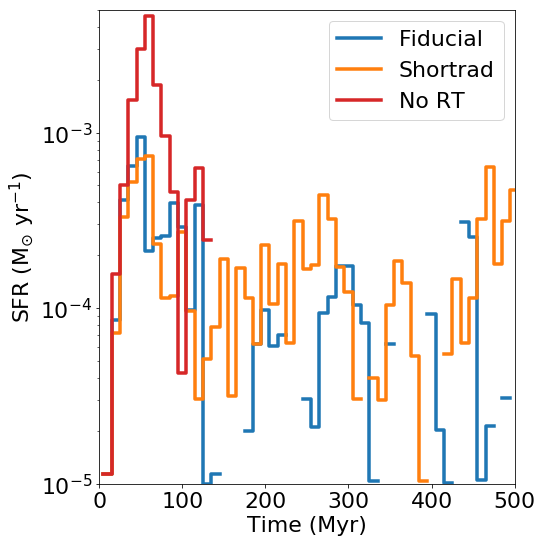

In [18]:
from galaxy_analysis.method_paper_plots import sfr_resolution

sfr_resolution.sfr_resolution(work_dir = '', output_dir = './rad_comparison/',
                              comparison = comparison, ylim = (1.0E-5, 5.0E-3), colors = colors)

In [8]:
data = dd.io.load('/home/aemerick/work/enzo_runs/sn_H2atten_H2_noion/DD0180_galaxy_data.h5')
print data['gas_meta_data']['masses']['CNM']['Total']

806844.5325798128


In [5]:
for k in colors:
    color_dict[k] = colors[k]

def plot_phase_comparison(comparison, plot_log = True, mass_field = 'mass_fractions'):
    dirs = {}
    labels = {}
    lstyle = {}
    for k in comparison.keys():
        dirs[k]   = comparison[k][0]
        labels[k] = comparison[k][1]
        lstyle[k] = comparison[k][2]
        
        
    all_data = {}
    for k in labels.keys():
        all_data[k] = {}
    
        
        dl, t = utilities.select_data_by_time(dir = dirs[k], tmin = 0.0, tmax = 700.0)
        all_data[k]['time'] = t - t[0]
        for weight in ['mass_fractions','volume_fractions','masses']:
            all_data[k][weight] = {}
            
            extra = ''
            if weight == 'masses':
                extra = '/Total'
                
            for phase in ['CNM','WNM','WIM','HIM']:
            
                
                field = '/gas_meta_data/' + weight + '/' + phase + extra
                print field
                all_data[k][weight][phase] = utilities.get_property(field, file_list = dl)
                
                
                # gonna log this later --- fix the zeros
                all_data[k][weight][phase][ all_data[k][weight][phase] == 0.0] = 1.0E-99
                if plot_log:
                    all_data[k][weight][phase] = np.log10(all_data[k][weight][phase])
                
    fig, ax = plt.subplots(2,4)
    fig.set_size_inches(24,12)    
    
    
    
    for k in all_data.keys():
        
        temp = all_data[k]
        
        
        f = 'CNM'
        ax[(0,0)].plot(temp['time'], temp[mass_field][f], lw = 3,
                       color = color_dict[k], ls = lstyle[k])
        ax[(1,0)].plot(temp['time'], temp['volume_fractions'][f], lw = 3,
                       color = color_dict[k], ls = lstyle[k])
        
        f = 'WNM'
        ax[(0,1)].plot(temp['time'], temp[mass_field][f], lw = 3,
                       color = color_dict[k], ls = lstyle[k])
        ax[(1,1)].plot(temp['time'], temp['volume_fractions'][f], lw = 3,
                       color = color_dict[k], ls = lstyle[k])
        
        f = 'WIM'
        ax[(0,2)].plot(temp['time'], temp[mass_field][f], lw = 3,
                       color = color_dict[k], ls = lstyle[k])
        ax[(1,2)].plot(temp['time'], temp['volume_fractions'][f], lw = 3,
                       color = color_dict[k], ls = lstyle[k])
        
        f = 'HIM'        
        ax[(0,3)].plot(temp['time'], temp[mass_field][f], lw = 3,
                       color = color_dict[k], ls = lstyle[k])
        ax[(1,3)].plot(temp['time'], temp['volume_fractions'][f], lw = 3,
                       color = color_dict[k], ls = lstyle[k])

    for a1 in ax:
        for a2 in a1:
            a2.set_xlabel(r'Time (Myr)')
            a2.set_ylabel(r'Fraction')
            a2.set_xlim(0.0,100.0)
            
            
            if plot_log:
                a2.set_ylim(-4,0)
            else:
                a2.set_ylim(0.0,1.0)
            #a2.semilogy()
            
    if mass_field == 'masses':
        for i in np.arange(4):
            ax[(0,i)].set_ylim(4,6.5)
    plt.tight_layout()
    
    log_str = ''
    if plot_log:
        log_str = '_logged'
    fig.savefig('./rad_comparison/phase_comparison' + log_str + '.png')
    

/gas_meta_data/mass_fractions/CNM
/gas_meta_data/mass_fractions/WNM
/gas_meta_data/mass_fractions/WIM
/gas_meta_data/mass_fractions/HIM
/gas_meta_data/volume_fractions/CNM
/gas_meta_data/volume_fractions/WNM
/gas_meta_data/volume_fractions/WIM
/gas_meta_data/volume_fractions/HIM
/gas_meta_data/masses/CNM/Total
/gas_meta_data/masses/WNM/Total
/gas_meta_data/masses/WIM/Total
/gas_meta_data/masses/HIM/Total
/gas_meta_data/mass_fractions/CNM
/gas_meta_data/mass_fractions/WNM
/gas_meta_data/mass_fractions/WIM
/gas_meta_data/mass_fractions/HIM
/gas_meta_data/volume_fractions/CNM
/gas_meta_data/volume_fractions/WNM
/gas_meta_data/volume_fractions/WIM
/gas_meta_data/volume_fractions/HIM
/gas_meta_data/masses/CNM/Total
/gas_meta_data/masses/WNM/Total
/gas_meta_data/masses/WIM/Total
/gas_meta_data/masses/HIM/Total
/gas_meta_data/mass_fractions/CNM
/gas_meta_data/mass_fractions/WNM
/gas_meta_data/mass_fractions/WIM
/gas_meta_data/mass_fractions/HIM
/gas_meta_data/volume_fractions/CNM
/gas_meta_da

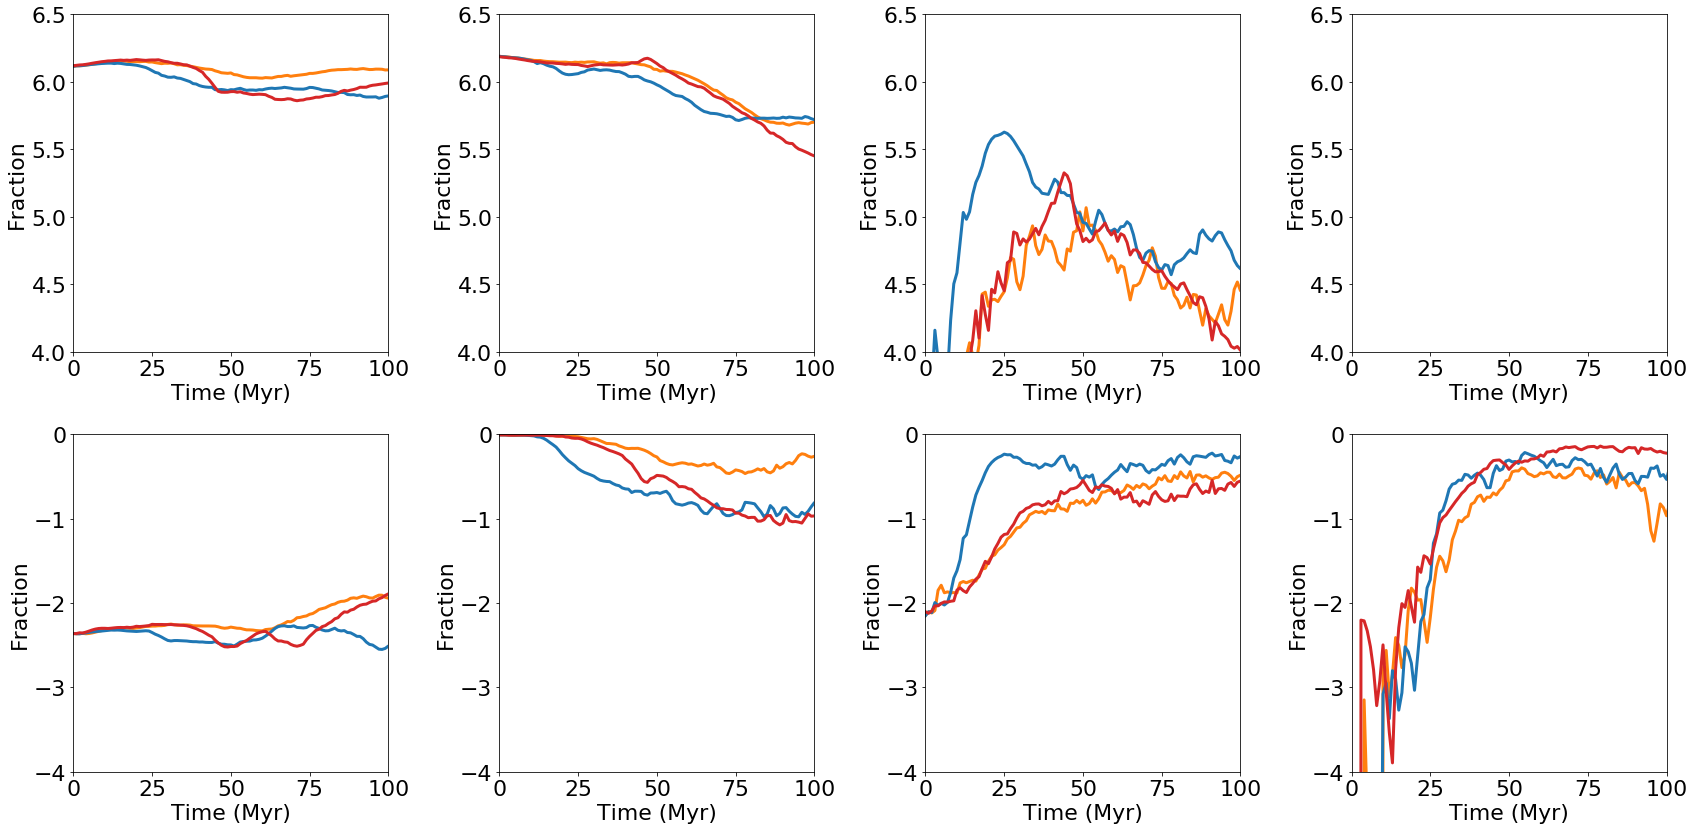

In [ ]:
plot_phase_comparison(comparison, plot_log = True, mass_field = 'masses')

In [ ]:
plot_phase_comparison(comparison)

/gas_meta_data/mass_fractions/CNM
/gas_meta_data/mass_fractions/WNM
/gas_meta_data/mass_fractions/WIM
/gas_meta_data/mass_fractions/HIM
/gas_meta_data/volume_fractions/CNM
/gas_meta_data/volume_fractions/WNM
/gas_meta_data/volume_fractions/WIM
/gas_meta_data/volume_fractions/HIM
/gas_meta_data/masses/CNM/Total
/gas_meta_data/masses/WNM/Total
/gas_meta_data/masses/WIM/Total
/gas_meta_data/masses/HIM/Total
/gas_meta_data/mass_fractions/CNM
/gas_meta_data/mass_fractions/WNM
/gas_meta_data/mass_fractions/WIM
/gas_meta_data/mass_fractions/HIM
/gas_meta_data/volume_fractions/CNM
/gas_meta_data/volume_fractions/WNM
/gas_meta_data/volume_fractions/WIM


In [ ]:
plot_phase_comparison(comparison,plot_log=False)

In [10]:
gal = Galaxy('DD0619', wdir = '/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/')

Parsing Hierarchy : 100%|██████████| 422/422 [00:00<00:00, 49166.56it/s]


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
141 abundance ratio fields defined
141 particle abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 422/422 [00:00<00:00, 41190.48it/s]
/home/aemerick/code/onezone/data_tables.py:90: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:


In [19]:
def _ion_fraction(field, data):
    return data['H_p1_fraction'] / (data['H_p0_fraction'] + data['H_p1_fraction'])
def _neutral_fraction(field,data):
    return data['H_p0_fraction'] / (data['H_p0_fraction'] + data['H_p1_fraction'])

yt.add_field(("gas","ion_fraction"), function=_ion_fraction, units='')
yt.add_field(("gas","neutral_fraction"), function = _neutral_fraction, units = '')

dsname = 'DD0142/DD0142'

nbin = 20

ds   = yt.load('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/' + dsname)
data = ds.all_data()
disk = ds.disk([0.5,0.5,0.5], [0,0,1], (0.5,'kpc'),(2,'kpc'))
prof = yt.Profile1D(disk, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_mass')
#prof.add_fields('ion_fraction')
#prof.add_fields('Temperature')
#prof.add_fields('number_density')

profv = yt.Profile1D(disk, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_volume')
profv.add_fields('ion_fraction')
profv.add_fields('Temperature')
profv.add_fields('number_density')


Parsing Hierarchy : 100%|██████████| 2816/2816 [00:00<00:00, 47589.38it/s]


In [20]:
dssh   = yt.load('/home/aemerick/work/enzo_runs/sn_H2atten_H2_shortrad/'  + dsname)
datash = dssh.all_data()
disksh = dssh.disk([0.5,0.5,0.5], [0,0,1], (0.5,'kpc'),(2,'kpc'))
profsh = yt.Profile1D(disksh, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_mass')

#profsh.add_fields('ion_fraction')
#profsh.add_fields('Temperature')
#profsh.add_fields('number_density')


profvsh = yt.Profile1D(disksh, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_volume')
profvsh.add_fields('ion_fraction')
profvsh.add_fields('Temperature')
profvsh.add_fields('number_density')

Parsing Hierarchy : 100%|██████████| 2638/2638 [00:00<00:00, 51494.27it/s]


In [21]:
dsnort   = yt.load('/home/aemerick/work/enzo_runs/sn_H2atten_H2_noion/'  + dsname)
datanort = dsnort.all_data()
disknort = dsnort.disk([0.5,0.5,0.5], [0,0,1], (0.5,'kpc'),(2,'kpc'))
profnort = yt.Profile1D(disknort, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_mass')
#profnort.add_fields('ion_fraction')
#profnort.add_fields('Temperature')
#profnort.add_fields('number_density')


profvnort = yt.Profile1D(disknort, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_volume')
profvnort.add_fields('ion_fraction')
profvnort.add_fields('Temperature')
profvnort.add_fields('number_density')

Parsing Hierarchy : 100%|██████████| 2801/2801 [00:00<00:00, 50825.64it/s]


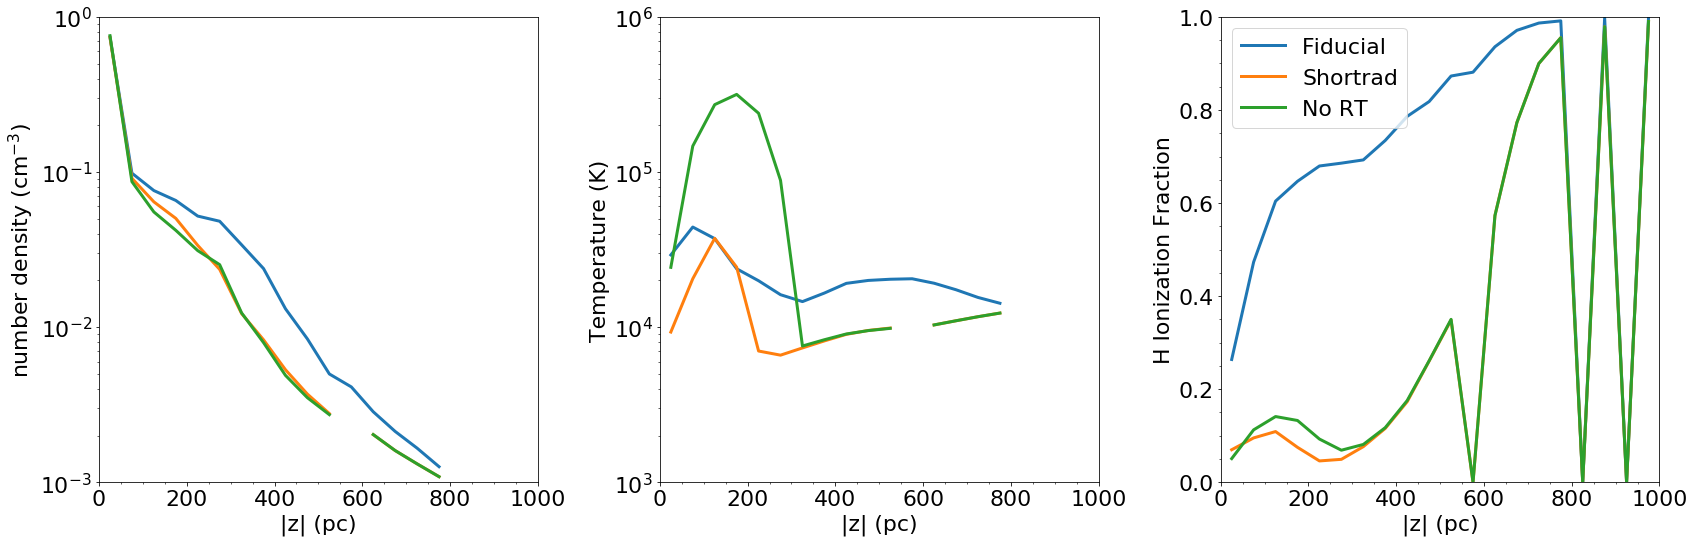

In [11]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(24,8)

#ax[0].plot(prof.x.to('pc'), prof['number_density'], lw = 3, color = 'C0', ls = '-')
ax[0].plot(profv.x.to('pc'), profv['number_density'], lw = 3, color = 'C0', ls = '-')
#ax[0].plot(profsh.x.to('pc'), profsh['number_density'], lw = 3, color = 'C1', ls = '-')
ax[0].plot(profvsh.x.to('pc'), profvsh['number_density'], lw = 3, color = 'C1', ls = '-')
ax[0].plot(profvnort.x.to('pc'), profvnort['number_density'], lw = 3, color = 'C2', ls = '-')

ax[0].semilogy()

#ax[1].plot(prof.x.to('pc'), prof['Temperature'], lw = 3, color = 'C0', ls = '-')
ax[1].plot(profv.x.to('pc'), profv['Temperature'], lw = 3, color = 'C0', ls = '-')
#ax[1].plot(profsh.x.to('pc'), profsh['Temperature'], lw = 3, color = 'C1', ls = '-')
ax[1].plot(profvsh.x.to('pc'), profvsh['Temperature'], lw = 3, color = 'C1', ls = '-')
ax[1].plot(profvnort.x.to('pc'), profvnort['Temperature'], lw = 3, color = 'C2', ls = '-')

ax[1].semilogy()

#ax[2].plot(prof.x.to('pc'), prof['ion_fraction'], lw = 3, color = 'C0', ls = '-')
ax[2].plot(profv.x.to('pc'), profv['ion_fraction'], lw = 3, color = 'C0', ls = '-', label = 'Fiducial')
#ax[2].plot(profsh.x.to('pc'), profsh['ion_fraction'], lw = 3, color = 'C1', ls = '-')
ax[2].plot(profvsh.x.to('pc'), profvsh['ion_fraction'], lw = 3, color = 'C1', ls = '-', label = 'Shortrad')
ax[2].plot(profvnort.x.to('pc'), profvnort['ion_fraction'], lw = 3, color = 'C2', ls = '-', label = 'No RT')

ax[0].minorticks_on()
ax[1].minorticks_on()
ax[2].minorticks_on()


ax[2].legend(loc='best')

ax[0].set_xlabel(r'|z| (pc)')
ax[1].set_xlabel(r'|z| (pc)')
ax[2].set_xlabel(r'|z| (pc)')
ax[0].set_xlim(0.0, 1000.0)
ax[1].set_xlim(0.0, 1000.0)
ax[2].set_xlim(0.0, 1000.0)

ax[0].set_ylim(0.001,1.0)
ax[1].set_ylim(1.0E3, 1.0E6)
ax[2].set_ylim(0.0,1.0)

ax[0].set_ylabel(r'number density (cm$^{-3}$)')
ax[1].set_ylabel(r'Temperature (K)')
ax[2].set_ylabel(r'H Ionization Fraction')
plt.tight_layout()

fig.savefig("./rad_comparison/density_temperature_ionization_z_profile.png")


In [22]:
for d in [data,datash,datanort]:
    n = d['number_density']
    m = d['cell_mass'].to('Msun')
    print "%4.4E %4.4E %4.4E %4.4E"%(np.max(n), np.sum(m[n>50]).to('Msun'), np.sum(m[n>100]).to('Msun'), np.sum(m[n>200]).to('Msun'))

2.7884E+02 1.8989E+05 3.9051E+04 5.3225E+02
3.2817E+02 2.2637E+05 6.1812E+04 2.0828E+03
6.7567E+02 2.4633E+05 8.4028E+04 1.6241E+04
